In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm

In [2]:
db_name = 'capstone'
db_host = 'localhost'
db_user = 'root'
db_password = 'rootroot'

connection = pymysql.connect(host=db_host,
                             user=db_user,
                             password=db_password,
                             db=db_name)

In [3]:
cursor = connection.cursor()

# Read data from the MySQL database into a Pandas DataFrameAssertionError
df = pd.read_sql('SELECT attendance, hteam, vteam, park_id, hleague, day, daynight, player_weights, player_heights, player_bats, player_throws, vscore FROM gm_logs', connection)

# Close the cursor and connection
cursor.close()
connection.close()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   attendance      203241 non-null  float64
 1   hteam           210012 non-null  object 
 2   vteam           210012 non-null  object 
 3   park_id         210012 non-null  object 
 4   hleague         210012 non-null  object 
 5   day             210012 non-null  object 
 6   daynight        210012 non-null  object 
 7   player_weights  210012 non-null  object 
 8   player_heights  210012 non-null  object 
 9   player_bats     210012 non-null  object 
 10  player_throws   210012 non-null  object 
 11  vscore          210012 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 19.2+ MB


In [5]:
df.isna().sum()

attendance        6771
hteam                0
vteam                0
park_id              0
hleague              0
day                  0
daynight             0
player_weights       0
player_heights       0
player_bats          0
player_throws        0
vscore               0
dtype: int64

In [6]:
# Fill NaN values in 'attendance' column with median and convert to int
df['attendance'] = df['attendance'].fillna(df['attendance'].median()).astype(int)

# Print DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   attendance      210012 non-null  int32 
 1   hteam           210012 non-null  object
 2   vteam           210012 non-null  object
 3   park_id         210012 non-null  object
 4   hleague         210012 non-null  object
 5   day             210012 non-null  object
 6   daynight        210012 non-null  object
 7   player_weights  210012 non-null  object
 8   player_heights  210012 non-null  object
 9   player_bats     210012 non-null  object
 10  player_throws   210012 non-null  object
 11  vscore          210012 non-null  int64 
dtypes: int32(1), int64(1), object(10)
memory usage: 18.4+ MB
None


In [7]:
df.head()

,attendance,hteam,vteam,park_id,hleague,day,daynight,player_weights,player_heights,player_bats,player_throws,vscore
0,0,WS1,BOS,WAS07,AL,Sat,D,"178,165,190,162,169,000,000,000,000","175,178,188,173,175,000,000,000,000","R,R,L,R,L,B,R,L,R","R,R,R,R,L,R,R,L,R",3
1,4593,PHI,BRO,PHI09,NL,Thu,D,"180,170,170,190,140,000,000,000,000","175,170,178,180,163,000,000,000,000","R,B,L,B,L,R,B,R,L","R,R,L,R,L,R,R,R,R",12
2,0,PIT,SLN,PIT05,NL,Sat,D,"162,170,160,167,160,000,000,000,000","178,178,170,168,178,000,000,000,000","R,R,R,L,R,R,,R,L","R,R,R,L,R,R,R,R,R",2
3,8061,PIT,SLN,PIT05,NL,Sat,D,"162,170,160,167,160,000,000,000,000","178,178,170,168,178,000,000,000,000","R,R,R,L,R,R,R,R,L","R,R,R,L,R,R,R,R,R",2
4,3000,BOS,DET,BOS07,AL,Thu,D,"140,175,190,168,175,000,000,000,000","168,185,183,178,180,000,000,000,000","B,L,L,R,R,L,L,L,R","R,R,L,R,R,R,L,R,R",15


In [8]:

# Create new columns with conditional logic for handling nulls
df["count_L_bats"] = df["player_bats"].fillna("").str.count("L")
df["count_L_throws"] = df["player_throws"].fillna("").str.count("L")

# Ensure the new columns have integer data types
df["count_L_bats"] = df["count_L_bats"].astype("int")
df["count_L_throws"] = df["count_L_throws"].astype("int")


In [9]:
import pandas as pd

# Function to handle object type 'player_weights' with NaNs, calculate median (int)
def process_weights(weight_str):
  # Check if it's a string
  if not isinstance(weight_str, str):
    return 0  # Handle non-string cases (e.g., return 0)
  
  # Extract weights (assuming comma-separated) and handle NaNs
  try:
    weights = [int(w.replace(',', '')) if not pd.isna(w) else 0 for w in weight_str.split(',')]
  except ValueError:
    # Handle potential conversion errors (e.g., non-numeric values in the string)
    return 0  # Or return another default value
  
  # Calculate and return median as int
  return int(pd.Series(weights).median())

# Create a new column with processed median
df['median_weights'] = df['player_weights'].apply(process_weights)
df['median_heights'] = df['player_heights'].apply(process_weights)

# Fill NaN values in 'attendance' column with median and convert to int
df['attendance'] = df['attendance'].astype(int)
df['median_weights'] = df['median_weights'].astype(int)
df['median_heights'] = df['median_heights'].astype(int)

# Replace 0s in 'median_weights' with the median of the entire column (consider other imputation strategies if needed)
df['median_weights'] = df['median_weights'].replace(0, df['median_weights'].median())
df['median_heights'] = df['median_heights'].replace(0, df['median_heights'].median())
df['attendance'] = df['attendance'].replace(0, df['attendance'].median())

# Print info
print(df.info())  # Print only the first few lines


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   attendance      210012 non-null  int32 
 1   hteam           210012 non-null  object
 2   vteam           210012 non-null  object
 3   park_id         210012 non-null  object
 4   hleague         210012 non-null  object
 5   day             210012 non-null  object
 6   daynight        210012 non-null  object
 7   player_weights  210012 non-null  object
 8   player_heights  210012 non-null  object
 9   player_bats     210012 non-null  object
 10  player_throws   210012 non-null  object
 11  vscore          210012 non-null  int64 
 12  count_L_bats    210012 non-null  int32 
 13  count_L_throws  210012 non-null  int32 
 14  median_weights  210012 non-null  int32 
 15  median_heights  210012 non-null  int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 21.6+ MB
None


In [10]:
df.head()

,attendance,hteam,vteam,park_id,hleague,day,daynight,player_weights,player_heights,player_bats,player_throws,vscore,count_L_bats,count_L_throws,median_weights,median_heights
0,17282,WS1,BOS,WAS07,AL,Sat,D,"178,165,190,162,169,000,000,000,000","175,178,188,173,175,000,000,000,000","R,R,L,R,L,B,R,L,R","R,R,R,R,L,R,R,L,R",3,3,2,162,173
1,4593,PHI,BRO,PHI09,NL,Thu,D,"180,170,170,190,140,000,000,000,000","175,170,178,180,163,000,000,000,000","R,B,L,B,L,R,B,R,L","R,R,L,R,L,R,R,R,R",12,3,2,140,163
2,17282,PIT,SLN,PIT05,NL,Sat,D,"162,170,160,167,160,000,000,000,000","178,178,170,168,178,000,000,000,000","R,R,R,L,R,R,,R,L","R,R,R,L,R,R,R,R,R",2,2,1,160,168
3,8061,PIT,SLN,PIT05,NL,Sat,D,"162,170,160,167,160,000,000,000,000","178,178,170,168,178,000,000,000,000","R,R,R,L,R,R,R,R,L","R,R,R,L,R,R,R,R,R",2,2,1,160,168
4,3000,BOS,DET,BOS07,AL,Thu,D,"140,175,190,168,175,000,000,000,000","168,185,183,178,180,000,000,000,000","B,L,L,R,R,L,L,L,R","R,R,L,R,R,R,L,R,R",15,5,2,140,168


In [11]:
#df = pd.concat([df,df_weights,df_heights], axis=1)

In [12]:
df.drop(columns=['player_weights', 'player_heights' , 'player_bats', 'player_throws'], inplace=True,axis=1)
df.drop_duplicates()
df.dropna(how='any',inplace=True)

In [13]:
df.head()

,attendance,hteam,vteam,park_id,hleague,day,daynight,vscore,count_L_bats,count_L_throws,median_weights,median_heights
0,17282,WS1,BOS,WAS07,AL,Sat,D,3,3,2,162,173
1,4593,PHI,BRO,PHI09,NL,Thu,D,12,3,2,140,163
2,17282,PIT,SLN,PIT05,NL,Sat,D,2,2,1,160,168
3,8061,PIT,SLN,PIT05,NL,Sat,D,2,2,1,160,168
4,3000,BOS,DET,BOS07,AL,Thu,D,15,5,2,140,168


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   attendance      210012 non-null  int32 
 1   hteam           210012 non-null  object
 2   vteam           210012 non-null  object
 3   park_id         210012 non-null  object
 4   hleague         210012 non-null  object
 5   day             210012 non-null  object
 6   daynight        210012 non-null  object
 7   vscore          210012 non-null  int64 
 8   count_L_bats    210012 non-null  int32 
 9   count_L_throws  210012 non-null  int32 
 10  median_weights  210012 non-null  int32 
 11  median_heights  210012 non-null  int32 
dtypes: int32(5), int64(1), object(6)
memory usage: 15.2+ MB


In [15]:
# Get dummies for the 'A' column
#dummies = pd.get_dummies(df['v_win_val'], prefix='vwin_')
# Add the dummy columns to the dataframe
#df = pd.concat([df, dummies], axis=1)

In [16]:
# Chnage catgories to numeric
#df['daynight'].replace({'day' : 1, 'night' : 0},inplace=True)
# Get dummies for the 'A' column
dummies = pd.get_dummies(df['daynight'], prefix='daynight_')
# Add the dummy columns to the dataframe
df = pd.concat([df, dummies], axis=1)

In [17]:
# Get dummies for the 'A' column
dummies = pd.get_dummies(df['hleague'], prefix='league_')
# Add the dummy columns to the dataframe
df = pd.concat([df, dummies], axis=1)

In [18]:
# Get dummies for the 'A' column
dummies = pd.get_dummies(df['day'], prefix='day_')
# Add the dummy columns to the dataframe
df = pd.concat([df, dummies], axis=1)

In [19]:
#pd.get_dummies(df, columns=['v_win_val'], prefix='binary_' , inplace = True)
#df_dummies = pd.get_dummies(df['v_win_val'], prefix='vteam_')

In [20]:
# create dummy variables
#dummies_game_type = pd.get_dummies(df['gametype'], dtype=int, prefix='gtype')

# concatenate the dummy variables to the original dataframe
#df = pd.concat([df, dummies_game_type], axis=1)

In [21]:
#imbalanace Traget Variable 
#df['v_win_val'].value_counts(normalize=True)

In [22]:
df.reset_index(drop=True)

,attendance,hteam,vteam,park_id,hleague,day,daynight,vscore,count_L_bats,count_L_throws,...,league__FL,league__ML,league__NL,day__Fri,day__Mon,day__Sat,day__Sun,day__Thu,day__Tue,day__Wed
0,17282,WS1,BOS,WAS07,AL,Sat,D,3,3,2,...,False,False,False,False,False,True,False,False,False,False
1,4593,PHI,BRO,PHI09,NL,Thu,D,12,3,2,...,False,False,True,False,False,False,False,True,False,False
2,17282,PIT,SLN,PIT05,NL,Sat,D,2,2,1,...,False,False,True,False,False,True,False,False,False,False
3,8061,PIT,SLN,PIT05,NL,Sat,D,2,2,1,...,False,False,True,False,False,True,False,False,False,False
4,3000,BOS,DET,BOS07,AL,Thu,D,15,5,2,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210007,20897,SFN,ARI,SFO03,NL,Tue,N,1,5,2,...,False,False,True,False,False,False,False,False,True,False
210008,39105,SLN,COL,STL10,NL,Tue,N,4,1,1,...,False,False,True,False,False,False,False,False,True,False
210009,26362,WAS,CHN,WAS11,NL,Tue,N,7,0,0,...,False,False,True,False,False,False,False,False,True,False
210010,20294,ANA,SEA,ANA01,AL,Tue,N,8,3,1,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# drop some coulmns and create a new dataframe
model_data = df.drop([ 'day', 'daynight', 'hteam', 'vteam', 'hleague', 'park_id'], axis=1)

In [24]:
model_data.isna().sum()

attendance        0
vscore            0
count_L_bats      0
count_L_throws    0
median_weights    0
median_heights    0
daynight__D       0
daynight__N       0
league__AL        0
league__FL        0
league__ML        0
league__NL        0
day__Fri          0
day__Mon          0
day__Sat          0
day__Sun          0
day__Thu          0
day__Tue          0
day__Wed          0
dtype: int64

In [25]:
# coor, Heatmap
model_data =  model_data.astype(int)

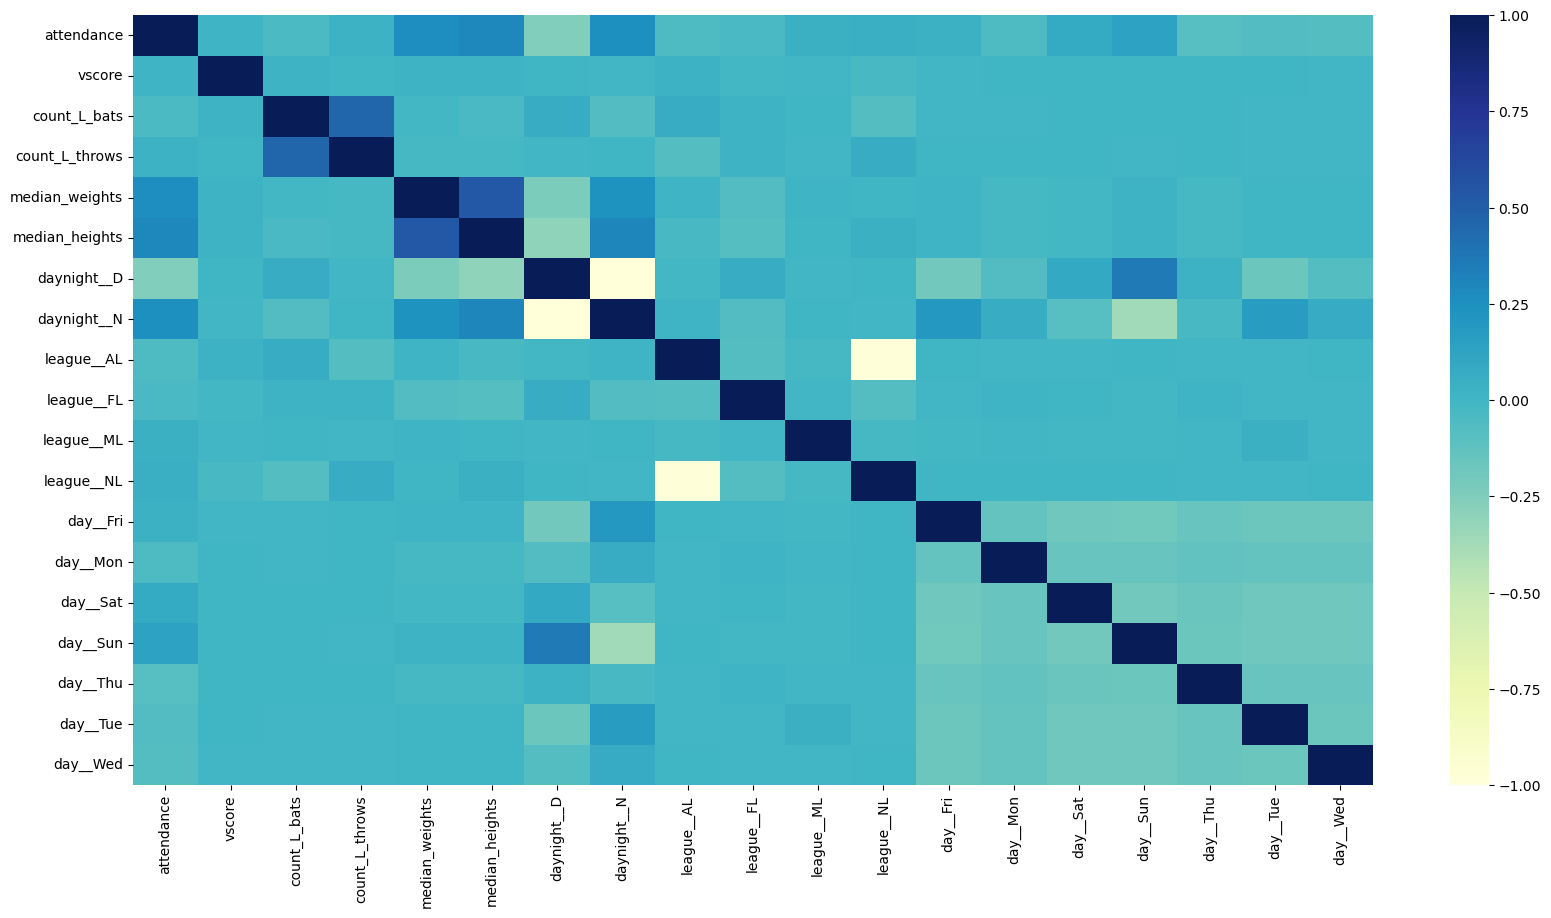

In [26]:
# Let's create the correlation matrix 
corr = model_data.corr()
plt.figure(figsize=(20,10))

# Create a heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [27]:
# let's drop for multi co-linear
model_data.drop(columns=['daynight__N'] , inplace=True)
# let's drop one column for multi co-linear
model_data.drop(columns=['day__Wed','league__AL','count_L_throws','median_heights'] , inplace=True)

In [28]:

# build a logistic regression model
X = model_data.drop('vscore', axis=1)
X_withconstant = sm.add_constant(X)
y = model_data['vscore']

In [29]:
model_data.isna().sum()

attendance        0
vscore            0
count_L_bats      0
median_weights    0
daynight__D       0
league__FL        0
league__ML        0
league__NL        0
day__Fri          0
day__Mon          0
day__Sat          0
day__Sun          0
day__Thu          0
day__Tue          0
dtype: int64

In [30]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 vscore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     32.14
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.59e-81
Time:                        10:07:07   Log-Likelihood:            -5.3979e+05
No. Observations:              210012   AIC:                         1.080e+06
Df Residuals:                  209998   BIC:                         1.080e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1207      0.111     28.235      0.000       2.904       3.337
attendance      2.537e-06   5.76e-07      4.407      0.000    1.41e-06    3.67e-06
count_L_bats       0.0464      0.005      8.812      0.000       0.036       0.057
median_weights     0.0062      0.001      9.613      0.000       0.005       0.008
daynight__D        0.0884      0.017      5.253      0.000       0.055       0.121
league__FL        -0.5112      0.091     -5.602      0.000      -0.690      -0.332
league__ML        -0.5299      0.329     -1.612      0.107      -1.174       0.115
league__NL        -0.1676      0.014    -12.051      0.000      -0.195      -0.140
day__Fri          -0.0071      0.025     -0.280      0.779      -0.057       0.043
day__Mon           0.0580      0.028      2.091      0.037       0.004       0.112
day__Sat           0.0329      0.025      1.303      0.193      -0.017       0.082
day__Sun           0.0200      0.027      0.750      0.453      -0.032       0.072
day__Thu           0.0562      0.027      2.077      0.038       0.003       0.109
day__Tue           0.0681      0.026      2.665      0.008       0.018       0.118
==============================================================================
Omnibus:                    33221.241   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57431.604
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                       4.496   Cond. No.                     1.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
Interpret = pd.DataFrame(myregression_results.params, columns=['coeffieceints']).reset_index()

In [32]:
Interpret

,index,coeffieceints
0,const,3.120745
1,attendance,0.000003
2,count_L_bats,0.046428
3,median_weights,0.006231
4,daynight__D,0.088368
5,league__FL,-0.511192
6,league__ML,-0.529867
7,league__NL,-0.167587
8,day__Fri,-0.007131
9,day__Mon,0.057961


In [33]:
#Get the coefficients from the trained model
coefficients = Interpret['coeffieceints']

# Get the feature names
feature_names = Interpret['index']

# Print the interpretation
print("Interpretation of Linear Regression Coefficients:")
for i, feature in enumerate(feature_names):
  coefficient = coefficients[i]
  sign = "+" if coefficient >= 0 else "-"
  print(f"{feature}: {sign}{abs(coefficient):.2f} - A {sign}coefficient indicates that a {abs(coefficient):.2f} unit increase in {feature} is associated with a {sign}{abs(coefficient):.2f} change in predicted vscore.")

Interpretation of Linear Regression Coefficients:
const: +3.12 - A +coefficient indicates that a 3.12 unit increase in const is associated with a +3.12 change in predicted vscore.
attendance: +0.00 - A +coefficient indicates that a 0.00 unit increase in attendance is associated with a +0.00 change in predicted vscore.
count_L_bats: +0.05 - A +coefficient indicates that a 0.05 unit increase in count_L_bats is associated with a +0.05 change in predicted vscore.
median_weights: +0.01 - A +coefficient indicates that a 0.01 unit increase in median_weights is associated with a +0.01 change in predicted vscore.
daynight__D: +0.09 - A +coefficient indicates that a 0.09 unit increase in daynight__D is associated with a +0.09 change in predicted vscore.
league__FL: -0.51 - A -coefficient indicates that a 0.51 unit increase in league__FL is associated with a -0.51 change in predicted vscore.
league__ML: -0.53 - A -coefficient indicates that a 0.53 unit increase in league__ML is associated with a 

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression

In [35]:
# encode the categorical column
# Categorical features for one-hot encoding
categorical_cols = ['vteam', 'hteam', 'park_id']

# One-hot encoding
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=model_data.index)

# Other features
#data_other_cols = model_data.drop(columns=categorical_cols)

# Concatenate features
model_data = pd.concat([data_hot_encoded, model_data], axis=1)


# Convert all feature names to strings
model_data.columns = model_data.columns.astype(str)

In [36]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Columns: 252 entries, 0 to day__Tue
dtypes: float64(238), int32(14)
memory usage: 392.6 MB


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = model_data.drop('vscore', axis=1)
y = model_data['vscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=16)


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instantiate the model (using the default parameters)
#logreg = LogisticRegression(solver='newton-cg', class_weight='balanced', random_state=16)
model = LinearRegression()

# fit the model with data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

feature_names = X_train.columns

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2:.2f}")

adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(feature_names))
print(f"Adjusted R-squared: {adjusted_r2:.2f}")

Mean Squared Error: 9.95
R-squared (R^2): 0.02
Adjusted R-squared: 0.01


In [39]:
model_data.head()

,0,1,2,3,4,5,6,7,8,9,...,daynight__D,league__FL,league__ML,league__NL,day__Fri,day__Mon,day__Sat,day__Sun,day__Thu,day__Tue
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [77]:
db_name = 'capstone'
db_host = 'localhost'
db_user = 'root'
db_password = 'rootroot'

connection = pymysql.connect(host=db_host,
                             user=db_user,
                             password=db_password,
                             db=db_name)

In [78]:
cursor = connection.cursor()

# Read data from the MySQL database into a Pandas DataFrameAssertionError
df_hruns = pd.read_sql('SELECT * FROM gm_logs', connection)

# Close the cursor and connection
cursor.close()
connection.close()

In [79]:
df_hruns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Data columns (total 46 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   playdate        210012 non-null  object 
 1   number          210012 non-null  int64  
 2   day             210012 non-null  object 
 3   vteam           210012 non-null  object 
 4   hteam           210012 non-null  object 
 5   vscore          210012 non-null  int64  
 6   hscore          210012 non-null  int64  
 7   hleague         210012 non-null  object 
 8   len_game        210012 non-null  int64  
 9   daynight        210012 non-null  object 
 10  park_id         210012 non-null  object 
 11  attendance      203241 non-null  float64
 12  len_min         207137 non-null  float64
 13  v_at_bats       210003 non-null  float64
 14  v_hits          210003 non-null  float64
 15  v_doubles       210003 non-null  float64
 16  v_triples       210003 non-null  float64
 17  v_hruns   

In [80]:
df_hruns.drop(columns=['playdate', 'number', 'hscore','v_win_val'],axis=1 , inplace=True)

In [81]:
df_hruns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210012 entries, 0 to 210011
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   day             210012 non-null  object 
 1   vteam           210012 non-null  object 
 2   hteam           210012 non-null  object 
 3   vscore          210012 non-null  int64  
 4   hleague         210012 non-null  object 
 5   len_game        210012 non-null  int64  
 6   daynight        210012 non-null  object 
 7   park_id         210012 non-null  object 
 8   attendance      203241 non-null  float64
 9   len_min         207137 non-null  float64
 10  v_at_bats       210003 non-null  float64
 11  v_hits          210003 non-null  float64
 12  v_doubles       210003 non-null  float64
 13  v_triples       210003 non-null  float64
 14  v_hruns         210003 non-null  float64
 15  v_rbi           210003 non-null  float64
 16  v_sh            210003 non-null  float64
 17  v_sf      

In [82]:
# Fill NaN values in 'attendance' column with median and convert to int
#df_hruns.drop(columns=['day', 'hteam', 'hleague', 'park_id'],inplace=True)

# Create new columns with conditional logic for handling nulls

df_hruns["count_L_bats"] = df_hruns["player_bats"].fillna("").str.count("L")
df_hruns["count_L_throws"] = df_hruns["player_throws"].fillna("").str.count("L")

# Ensure the new columns have integer data types
df_hruns["count_L_bats"] = df_hruns["count_L_bats"].astype("int")
df_hruns["count_L_throws"] = df_hruns["count_L_throws"].astype("int")


# Create a new column with processed median
df_hruns['median_weights'] = df_hruns['player_weights'].apply(process_weights)
df_hruns['median_heights'] = df_hruns['player_heights'].apply(process_weights)


df_hruns.fillna(method='ffill',inplace=True)
df_hruns.drop_duplicates()
df_hruns.dropna(how='any',inplace=True)

# Fill NaN values in 'attendance' column with median and convert to int
df_hruns['attendance'] = df_hruns['attendance'].astype(int)
df_hruns['median_weights'] = df_hruns['median_weights'].astype(int)
df_hruns['median_heights'] = df_hruns['median_heights'].astype(int)

# Replace 0s in 'median_weights' with the median of the entire column (consider other imputation strategies if needed)
df_hruns['median_weights'] = df_hruns['median_weights'].replace(0, df_hruns['median_weights'].median())
df_hruns['median_heights'] = df_hruns['median_heights'].replace(0, df_hruns['median_heights'].median())
df_hruns['attendance'] = df_hruns['attendance'].replace(0, df_hruns['attendance'].median())


df_hruns.drop(columns=['player_weights','player_heights', 'player_throws', 'player_bats'],axis=1 , inplace=True)

#df_hruns['attendance'] = df_hruns['attendance'].fillna(df_hruns['attendance'].median()).astype(int)

# data errors , modify the negative values to the absolute values
# Change negative values to absolute values
df_hruns['v_rbi'] = df_hruns['v_rbi'].abs()
df_hruns['v_sf'] = df_hruns['v_sf'].abs()
df_hruns['v_hit_pitch'] = df_hruns['v_hit_pitch'].abs()
df_hruns['v_walks'] = df_hruns['v_walks'].abs()
df_hruns['v_in_walks'] = df_hruns['v_in_walks'].abs()
df_hruns['v_strkouts'] = df_hruns['v_strkouts'].abs()
df_hruns['v_cau_stl'] = df_hruns['v_cau_stl'].abs()
df_hruns['v_grd_dbl'] = df_hruns['v_grd_dbl'].abs()
df_hruns['v_af_ci'] = df_hruns['v_af_ci'].abs()
df_hruns['h_in_runs'] = df_hruns['h_in_runs'].abs()
df_hruns['h_er_runs'] = df_hruns['h_er_runs'].abs()

In [83]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Specify columns for one-hot encoding
categorical_cols = ['day', 'daynight', 'hteam', 'vteam', 'hleague', 'park_id']

# One-Hot Encoding
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
array_hot_encoded = ohe.fit_transform(df_hruns[categorical_cols])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df_hruns.index)

# Extract non-encoded columns
data_other_cols = df_hruns.drop(columns=categorical_cols)

# Concatenate encoded and non-encoded data
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

dta_out_v_rbi = data_out.copy()

# Convert column names to strings
data_out.columns = data_out.columns.astype(str)

# Feature variable (all columns except v_hruns)
X = data_out.drop('vscore', axis=1)

# Target variable (v_hruns)
y = data_out['vscore']

# Split data into training and testing sets (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Feature Scaling (after train-test split)
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on training data only
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test data using the fitted scaler

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on scaled features
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set (using scaled features)
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.21


In [84]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances by value (descending order)
indices = np.argsort(importances)[::-1]

# Extract feature names
feature_names = list(X.columns)

# Print top 10 most influential features
print("Top 10 Most Influential Features:")
for f in range(10):
  print(f"{f+1}. {feature_names[indices[f]]} (Importance: {importances[indices[f]]:.4f})")


Top 10 Most Influential Features:
1. v_rbi (Importance: 0.9426)
2. h_errors (Importance: 0.0102)
3. v_hits (Importance: 0.0101)
4. h_in_runs (Importance: 0.0096)
5. h_er_runs (Importance: 0.0020)
6. v_walks (Importance: 0.0017)
7. v_lft_base (Importance: 0.0016)
8. len_game (Importance: 0.0013)
9. attendance (Importance: 0.0013)
10. len_min (Importance: 0.0012)


In [85]:
dta_out_v_rbi['vscore'].head()

0     3
1    12
2     2
3     2
4    15
Name: vscore, dtype: int64

In [86]:
# Check for negative values
negative_cols = dta_out_v_rbi.lt(0).any(axis=0)  # Find columns with at least one negative value

if negative_cols.any():
  print("Columns with negative values:")
  for col in negative_cols.index[negative_cols]:
    print(col)
else:
  print("There are no negative values in the DataFrame")

There are no negative values in the DataFrame


In [89]:
from sklearn.linear_model import PoissonRegressor

dta_out_v_rbi.drop('vscore', axis=1, inplace=True)

# Convert column names to strings
dta_out_v_rbi.columns = dta_out_v_rbi.columns.astype(str)

# Feature variable (all columns except v_hruns)
X = dta_out_v_rbi.drop('v_rbi', axis=1)

# Target variable (v_hruns)
y = dta_out_v_rbi['v_rbi']

# Split data into training and testing sets (75% for training, 25% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Feature Scaling (after train-test split)
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on training data only
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test data using the fitted scaler

# Create a Poisson Regression model
#model_v_rbi = PoissonRegressor()

# Create a Random Forest Regression model
model_v_rbi = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on scaled features
model_v_rbi.fit(X_train_scaled, y_train)

# Train the model on features
#model_v_rbi.fit(X_train, y_train)

# Make predictions on the testing set (using scaled features)
y_pred = model_v_rbi.predict(X_test_scaled)

# Make predictions on the testing set
#y_pred = model_v_rbi.predict(X_test)

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.60


In [90]:
# Get feature importances from the trained model
importances = model_v_rbi.feature_importances_

# Sort feature importances by value (descending order)
indices = np.argsort(importances)[::-1]

# Extract feature names
feature_names = list(X.columns)

# Print top 10 most influential features
print("Top 10 Most Influential Features:")
for f in range(10):
  print(f"{f+1}. {feature_names[indices[f]]} (Importance: {importances[indices[f]]:.4f})")
  #abs_importance = abs(importances[f])  # Use absolute value for coefficients
  #print(f"{f+1}. {feature_names[f]} (Importance: {abs_importance:.4f})")

Top 10 Most Influential Features:
1. h_in_runs (Importance: 0.8766)
2. h_errors (Importance: 0.0149)
3. v_hits (Importance: 0.0144)
4. v_lft_base (Importance: 0.0064)
5. v_at_bats (Importance: 0.0063)
6. h_er_runs (Importance: 0.0061)
7. v_walks (Importance: 0.0059)
8. attendance (Importance: 0.0042)
9. len_game (Importance: 0.0041)
10. len_min (Importance: 0.0041)
